In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

In [2]:
testing = image_dataset_from_directory("Brain_tumor\\Testing", pad_to_aspect_ratio=True)
training = image_dataset_from_directory("Brain_tumor\\Training", pad_to_aspect_ratio=True)

Found 1311 files belonging to 4 classes.
Found 5712 files belonging to 4 classes.


In [3]:
training_set = training.take(int(0.25*len(training)))
testing_set = testing.take(int(0.25*len(testing)))

In [4]:
def data_vectorizer(data:tf.data.Dataset):
    data = data.unbatch()
    size = len(list(data))
    vector = np.empty((size, 256*256*3), dtype=np.float32)
    labels = np.empty((size,))
    j = 0
    for img, label in data:
        vector[j, :] = img.numpy().flatten()
        labels[j] = label.numpy()
        j += 1
    return vector, labels

In [5]:
x_train, y_train = data_vectorizer(training_set)
x_test, y_test = data_vectorizer(testing_set)

In [6]:
print("Training set size: {}".format(np.shape(x_train)))
print("Testing set size: {}".format(np.shape(x_test)))

Training set size: (1408, 196608)
Testing set size: (320, 196608)


In [45]:
%%time
model = make_pipeline(MinMaxScaler((0, 1)), OneVsRestClassifier(Perceptron()))
model.fit(x_train, y_train)

CPU times: total: 17.4 s
Wall time: 43.7 s


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=Perceptron()))])

Accuracy: 0.778125
Precision: 0.7692215401785715
Recall: 0.778125
F1: 0.7700368192565789

(320,)
['meningioma', 'meningioma', 'pituitary', 'pituitary', 'glioma', 'glioma', 'pituitary', 'notumor', 'glioma', 'pituitary', 'pituitary', 'pituitary', 'notumor', 'glioma', 'notumor', 'glioma', 'glioma', 'meningioma', 'notumor', 'glioma', 'pituitary', 'pituitary', 'meningioma', 'glioma', 'notumor', 'notumor', 'notumor', 'pituitary', 'notumor', 'notumor', 'notumor', 'glioma', 'meningioma', 'notumor', 'notumor', 'pituitary', 'meningioma', 'meningioma', 'pituitary', 'notumor', 'glioma', 'glioma', 'glioma', 'notumor', 'glioma', 'meningioma', 'pituitary', 'meningioma', 'glioma', 'glioma', 'notumor', 'notumor', 'notumor', 'glioma', 'glioma', 'notumor', 'glioma', 'meningioma', 'notumor', 'pituitary', 'notumor', 'meningioma', 'meningioma', 'meningioma', 'glioma', 'pituitary', 'glioma', 'glioma', 'pituitary', 'pituitary', 'notumor', 'glioma', 'pituitary', 'notumor', 'notumor', 'glioma', 'meningioma', 'm

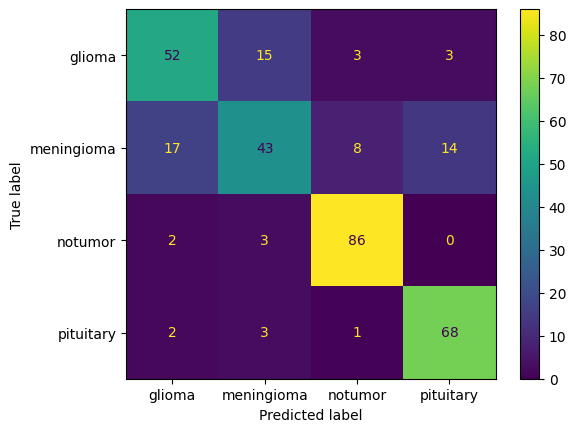

In [41]:
outputs = model.predict(x_test)
print("Accuracy: {}".format(accuracy_score(y_test, outputs)))
print("Precision: {}".format(precision_score(y_test, outputs, average='weighted')))
print("Recall: {}".format(recall_score(y_test, outputs, average='weighted')))
print("F1: {}".format(f1_score(y_test, outputs, average='weighted')))
print()
conf_mat = confusion_matrix(y_test, outputs)
print(np.shape(outputs))
test_labels = [training.class_names[int(x)] for x in y_test]
output_labels = [training.class_names[int(x)] for x in outputs]
print(output_labels)
conf_mat_plt = ConfusionMatrixDisplay.from_predictions(test_labels, output_labels)